# EJERCICIO 4

Para los datos del problema 1, comparar los niveles medios de VEF entre fumadores y no fumadores de chicos entre 10 y 14 años y entre chicas de 10 y 14 años.

In [61]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [62]:
df = pd.read_excel('VEF.xls')


In [63]:
df2 = (df[['Edad','VEF', 'Sexo', 'Fumador']])

In [64]:
# fumador == 1   no fumador == 0    chico == 1    chica == 0 

def get_VEF(df2,sexo,fumador):
    df = df2[df2['Edad'] <= 14][['Sexo','Fumador','VEF','Edad']]
    df1 = df[df['Edad'] > 10][['Sexo','Fumador','VEF','Edad']]
    
    fumadores = df1[df1['Fumador']==fumador][['Sexo','Fumador','VEF']]   
    fumadores_sexo=fumadores[fumadores['Sexo']==sexo][['Sexo',"Fumador", "VEF"]] 
    
    lista = pd.Series.tolist(fumadores_sexo['VEF'])
    
    return (lista)

In [65]:
# fumador == 1   no fumador == 0    chico == 1    chica == 0 
vef_chicos_fumadores= (get_VEF(df2, 1, 1))
vef_chicos_nofumadores= (get_VEF(df2, 1, 0))
vef_chicas_fumadoras= (get_VEF(df2, 0, 1))
vef_chicas_nofumadoras= (get_VEF(df2, 0, 0))

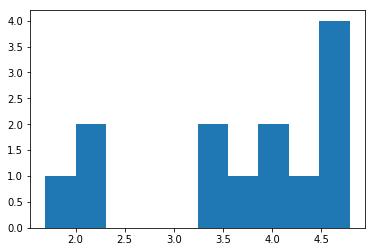

In [66]:
plt.hist(vef_chicos_fumadores)
plt.show()

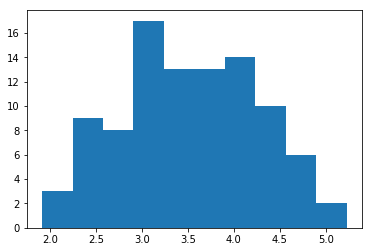

In [67]:
plt.hist(vef_chicos_nofumadores)
plt.show()

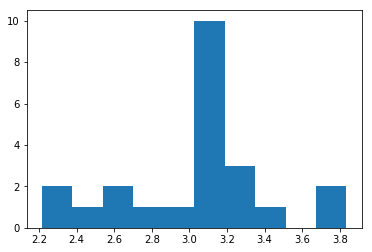

In [68]:
plt.hist(vef_chicas_fumadoras)
plt.show()

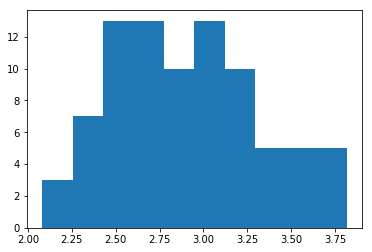

In [69]:
mean_chicas_nofumadoras= np.mean(vef_chicas_nofumadoras)
plt.hist(vef_chicas_nofumadoras)
plt.show()

### Contraste de hipotesis medias independientes

#### chicas fumadoras vs chicas no fumadoras 

- H_0: media fumadores = media no fumadores
- H_1: media fumadores != media no fumadores


In [70]:
def contrast_medias_ind(fumadores, no_fumadores,alpha):
    n_1 = len(fumadores)
    n_2 = len(no_fumadores)
    s_1 = ss.sem(fumadores)*np.sqrt(n_1)
    s_2 = ss.sem(no_fumadores)*np.sqrt(n_2)
    
    s = np.sqrt(((n_1-1)*s_1 + (n_2-1)*s_2)/n_1+n_2-2)
    
    x1_barra = np.mean(fumadores)
    x2_barra = np.mean(no_fumadores)

    t = (x1_barra - x2_barra)/(s*np.sqrt(1/n_1+1/n_2))
    
    if t > ss.t.ppf(1-alpha/2, n_1+n_2 - 2) or t < - ss.t.ppf(1-alpha/2, n_1+n_2 -2):
        print("Rechazamos H_0")
    else:
        print("Aceptamos H_0")

In [71]:
contrast_medias_ind(vef_chicas_fumadoras,vef_chicas_nofumadoras,0.05)

Aceptamos H_0


#### chicos fumadores vs chicos no fumadores 

In [72]:
contrast_medias_ind(vef_chicos_fumadores,vef_chicos_nofumadores,0.05)

Aceptamos H_0


Representamos gráficamente los datos:

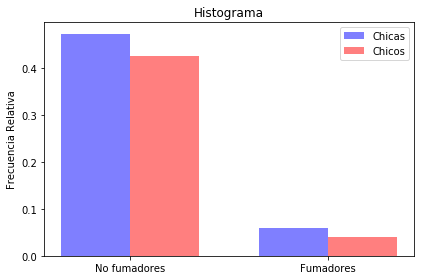

In [78]:
def rel_freq(df,sex,fum): #te devuelve la frecuencia relativa en funcion del sexo y fumador
    ind = 0
    for i in range(len(df)):
        if df['Sexo'][i] == sex and df['Fumador'][i] == fum:
            ind+=1
        else:
            pass
    return (ind/len(df))

chicos_f = rel_freq(df,1,1)
chicas_f = rel_freq(df,0,1)
chicos_nf = rel_freq(df,1,0)
chicas_nf = rel_freq(df,0,0)


# data to plot


n_groups = 2 #numero de grupos de barras que queremos, en este caso queremos dos, de hombres y de mujeres
means_M = (chicos_nf, chicas_f)
means_H = (chicas_nf, chicos_f)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5

#dibujamos las barras, bar1 representa a las mujeres (rojo), bar2 a los hombres, verde.
bar1 = plt.bar(index, means_M, bar_width, alpha=opacity, color='b', label='Chicas')
 
bar2 = plt.bar(index + bar_width, means_H, bar_width, alpha=opacity, color='r', label='Chicos')

plt.ylabel('Frec. Relativa')
plt.title('Histograma')
plt.xticks(index + bar_width/2, ('No fumadores', 'Fumadores')) #colocamos las labels
plt.legend()
 
plt.tight_layout() #ajusta tu gráfica al marco (figure)
plt.show()